# Introduction to Data Visualization with Plotly/Dash in Jupyter Notebook

---

##Introductiontes)

### Why is data visualization important?

Data visualization is the graphical representation of information and data. It uses visual elements like charts, graphs, and maps to provide an accessible way to understand trends, outliers, and patterns in data. Here are some reasons why it's important:

- **Quick Interpretation**: Visual data is more easily and quickly understood than raw data.
- **Reveal Trends**: Helps in identifying patterns, correlations, and trends in the data.
- **Informed Decision Making**: Businesses and researchers can make informed decisions based on visual representations.
- **Engagement**: Visuals are generally more engaging than tables of raw data, making it easier to communicate findings to others.

### Brief introduction to Plotly and Dash

- **Plotly**: An open-source graphing library that allows users to create interactive visualizations. It supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

- **Dash**: A Python framework (built on Flask) for building analytical web applications. No JavaScript required. With Dash, you can create web-based data dashboards and applications using only Python.

### Setting up Jupyter notebook for Plotly

1. **Installation**: Both Plotly and Jupyter can be installed via pip:
   ```python
   !pip install plotly jupyter


# **Plotly Express**


[<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Plotly-logo-01-square.png" width="250"/>](image.png)

Positives:
- ✔️ Quickly make interactive plots
- ✔️ Like seaborn but interactive

Negatives:
- ❌ Hard to customize
- ❌ Some default plots (bar) look gross

## 2. Basics of Plotly 

---

### The Plotly Python Graphing Library

Plotly's Python graphing library is an interactive, open-source plotting library that supports over 40 unique chart types. Here are some features:

- **Interactivity**: Hover over points, zoom, pan, and see data values.
- **Export and Sharing**: Charts can be exported to various formats and shared.
- **Integration**: Works well with popular Python data manipulation libraries like Pandas.

---

### Plotly Express vs. Graph Objects

- **Plotly Express (PX)**: A high-level interface for creating a variety of visualizations easily and with minimal code. It's a simpler way to start with Plotly.
  ```python
  import plotly.express as px
  fig = px.line(data_frame=df, x='Date', y='Value', title='Sample Line Plot')
  fig.show()
  


- **Graph Objects (GO)**: A more detailed, lower-level interface offering more customization options. It's powerful but requires more code.
  ```python
  import plotly.graph_objects as go
  fig = go.Figure(data=go.Line(x=df['Date'], y=df['Value']))
  fig.show()


### Anatomy of a Plotly chart

- **Data**: Defines the visualized data. It can be a scatter plot, bar plot, etc.
- **Layout**: Defines how the plot looks, including the title, axis labels, and other visual components.
- **Trace**: A single visual element, such as a line in a line chart or a bar in a bar chart.

---

### Interactive capabilities

One of Plotly's most powerful features is its interactivity:

- **Hovering**: Hover over data points to see their values.
- **Zooming and Panning**: Zoom in on areas of interest or pan across the plot.
- **Clickable Legends**: Click on legend items to show/hide data series.
- **Update Menus and Sliders**: Add dropdowns or sliders to let viewers change plot data or appearance.

### Importing necessary modules and Loading datasets:

In [2]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import gaussian_kde
# Import necessary libraries
import seaborn as sns

import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


## 3. Basic Plots

### 3.1. Line Plots

Line plots are often used to display the evolution of a metric or value over time or across a continuous variable. They are particularly effective at showing trends and patterns.

**Introduction and use-cases:**  

* **Time Series Data**: One of the most common use-cases for line plots is to visualize time series data, such as stock prices, weather patterns, or sales data over time.
* **Comparing Multiple Series**: Line plots can be used to compare multiple data series on the same chart, allowing for easy comparison.
* **Highlighting Trends**: They are useful for spotting trends or patterns in a dataset over a continuous range.

**Basic Line Plot**

Let's start by plotting a basic line chart using synthetic data.



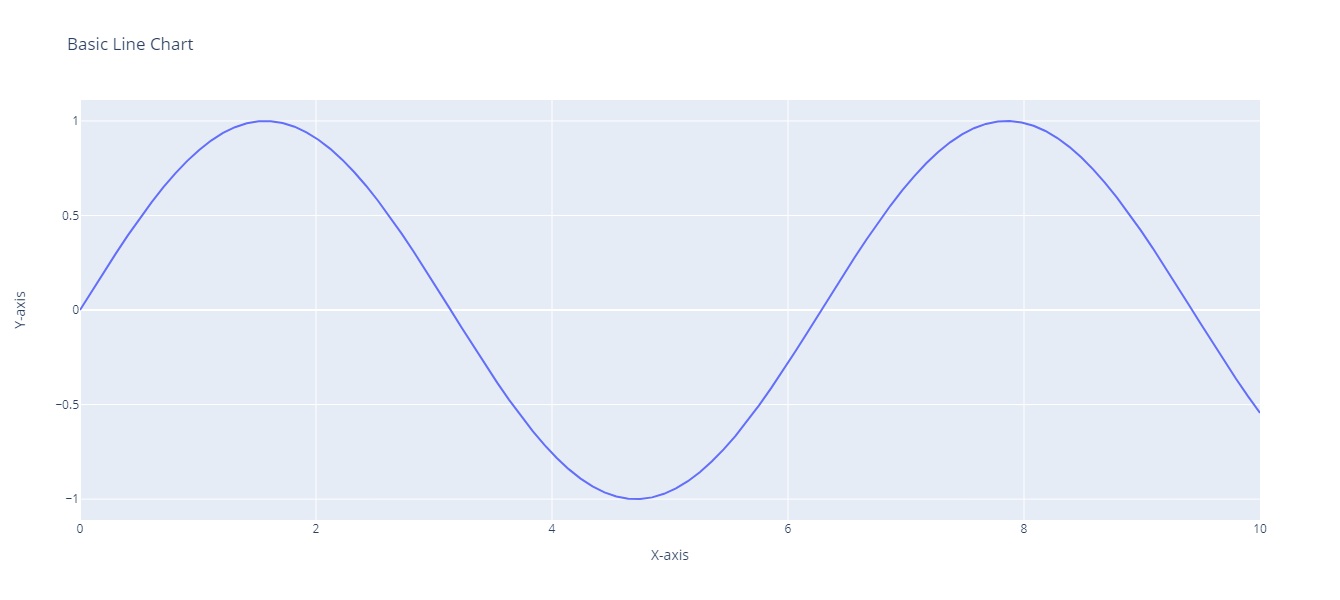

In [5]:
# Generate synthetic data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Basic line chart
fig = px.line(x=x, y=y, title="Basic Line Chart", labels={'x': 'X-axis', 'y': 'Y-axis'})

# Update layout to adjust figure size
fig.update_layout(width=1000, height=600)

fig.show()

### Customizing the Line Chart

Now, let's dive into customizations. We'll use a subplot to show multiple customizations side by side:

- **Changing Line Style and Color**: Demonstrates how to customize the appearance of the line.
- **Adding Markers**: Adds markers to the data points on the line.
- **Customizing Axes**: Shows how to modify the appearance and scale of the axes.
- **Adding Annotations**: Demonstrates how to add text notes or shapes to highlight specific points or areas.

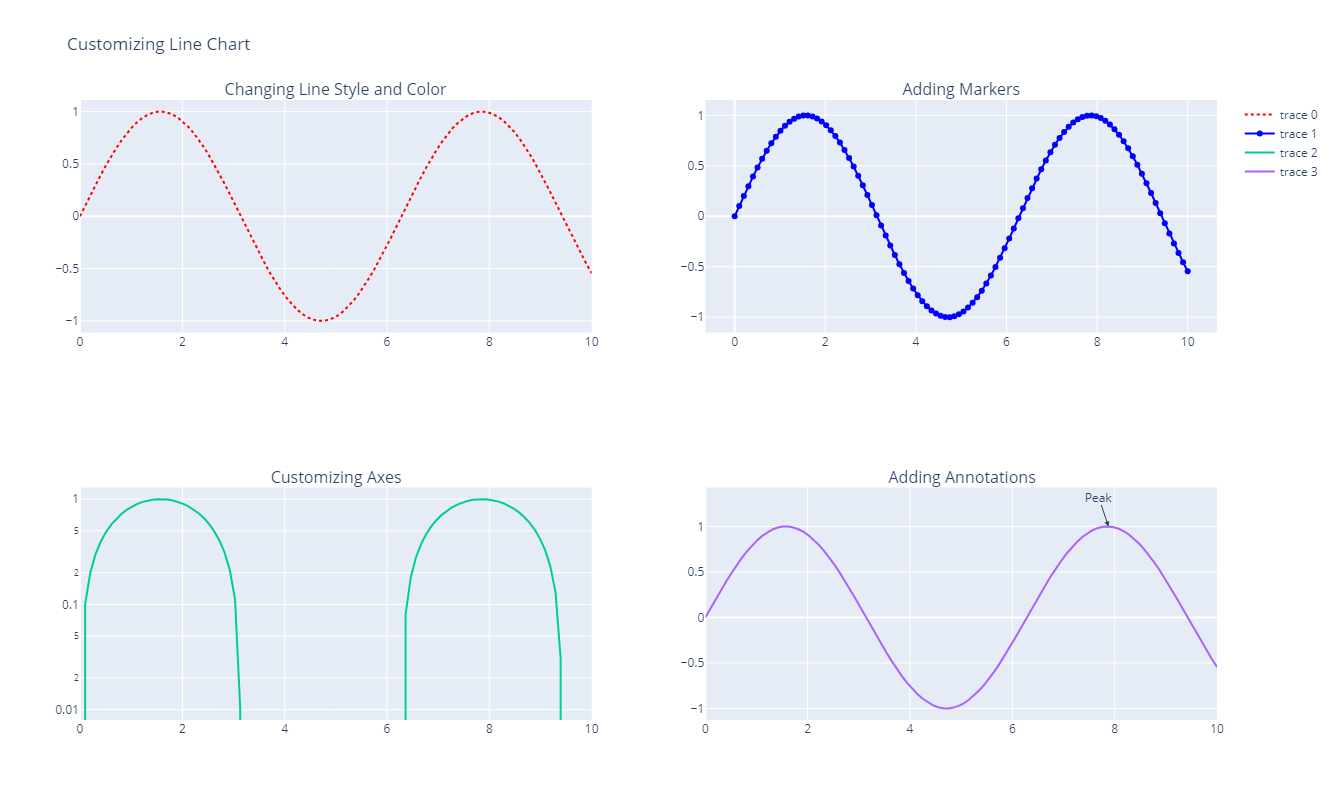

In [7]:
# Create a subplot with a 2x2 layout to display multiple customizations side by side
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Changing Line Style and Color', 
                                    'Adding Markers',
                                    'Customizing Axes',
                                    'Adding Annotations'))

# 1. Changing Line Style and Color
# Red dotted line to demonstrate line style and color customization
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color='red', dash='dot')), row=1, col=1)

# 2. Adding Markers
# Line with blue markers at each data point
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', marker=dict(color='blue', size=6)), row=1, col=2)

# 3. Customizing Axes
# Line plot with a logarithmic y-axis
fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=2, col=1)
fig.update_yaxes(type="log", row=2, col=1)  # Setting the y-axis to a logarithmic scale

# 4. Adding Annotations
# Line plot with an arrow annotation pointing at the peak value
fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=2, col=2)
fig.add_annotation(text="Peak",
                  x=x[np.argmax(y)], y=np.max(y),
                  arrowhead=2, showarrow=True,
                  xref="x4", yref="y4")

# Update layout to include a title and adjust the figure size
# Note: Width and height are in pixels. You can adjust these values based on your preferences.
fig.update_layout(title_text="Customizing Line Chart", width=1000, height=800)

### 3.2. Scatter Plots

Scatter plots are fundamental in data visualization and are used to display the relationship between two continuous variables. Each axis represents one variable, and each data point is plotted as a dot.

**Introduction and use-cases**

Scatter plots are particularly useful in the following scenarios:

- **Observing Relationships**: If you want to understand the relationship between two variables, scatter plots can quickly highlight the type of relationship (e.g., linear, exponential).
- **Identifying Correlations**: While correlation does not imply causation, a scatter plot can showcase how two variables move in relation (positively correlated, negatively correlated, or no correlation).
- **Spotting Outliers**: Outliers can be easily spotted in scatter plots, which can be crucial for data cleaning and further analysis.

**Scatter Line Chart**

A basic scatter plot requires values for the x-axis and y-axis. Each point on the scatter plot corresponds to one data point in the dataset.


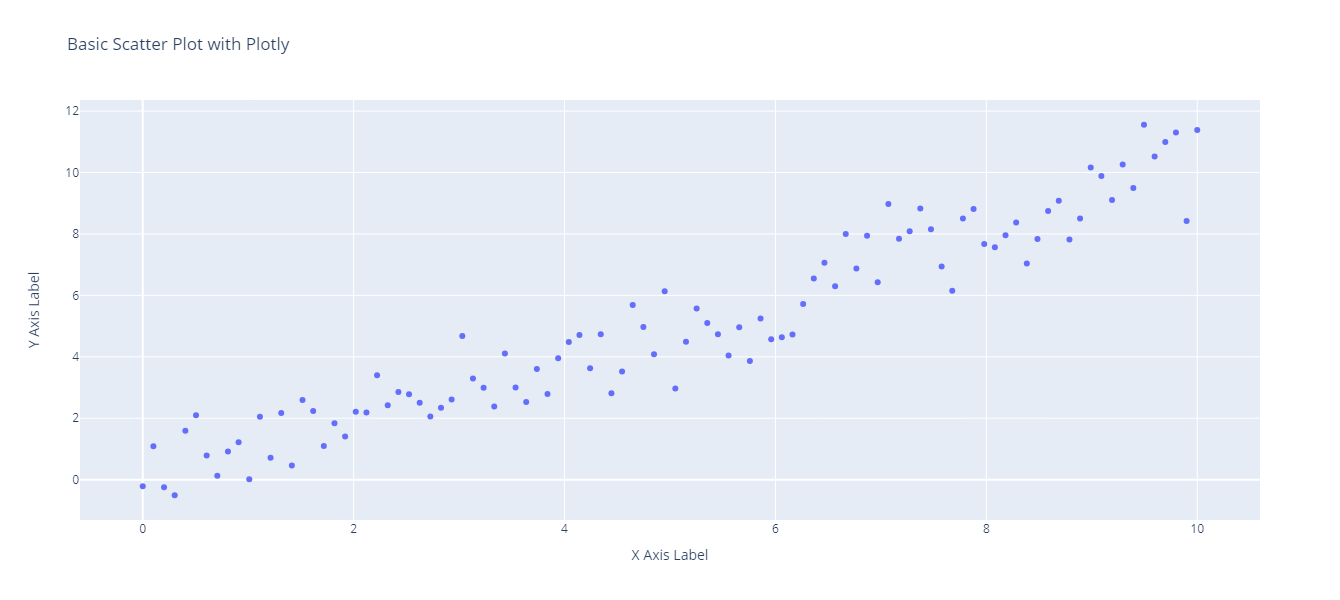

In [9]:
# Generating synthetic data for demonstration
# Creating an array of numbers from 0 to 10 for the x-axis
x = np.linspace(0, 10, 100)

# Creating a linear relationship for y-values with some added random noise
y = x + np.random.normal(0, 1, 100)

# Creating the scatter plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# Adding title and labels to the axes
fig.update_layout(title="Basic Scatter Plot with Plotly",
                  xaxis_title="X Axis Label",
                  yaxis_title="Y Axis Label",
                 width=1000, height=600)


# Display the scatter plot
fig.show()


**Customizing the Scatter Chart**

With Plotly, we can customize scatter plots in various ways, such as changing the marker style, color, size, and more. We'll explore some of these customizations in the following examples.

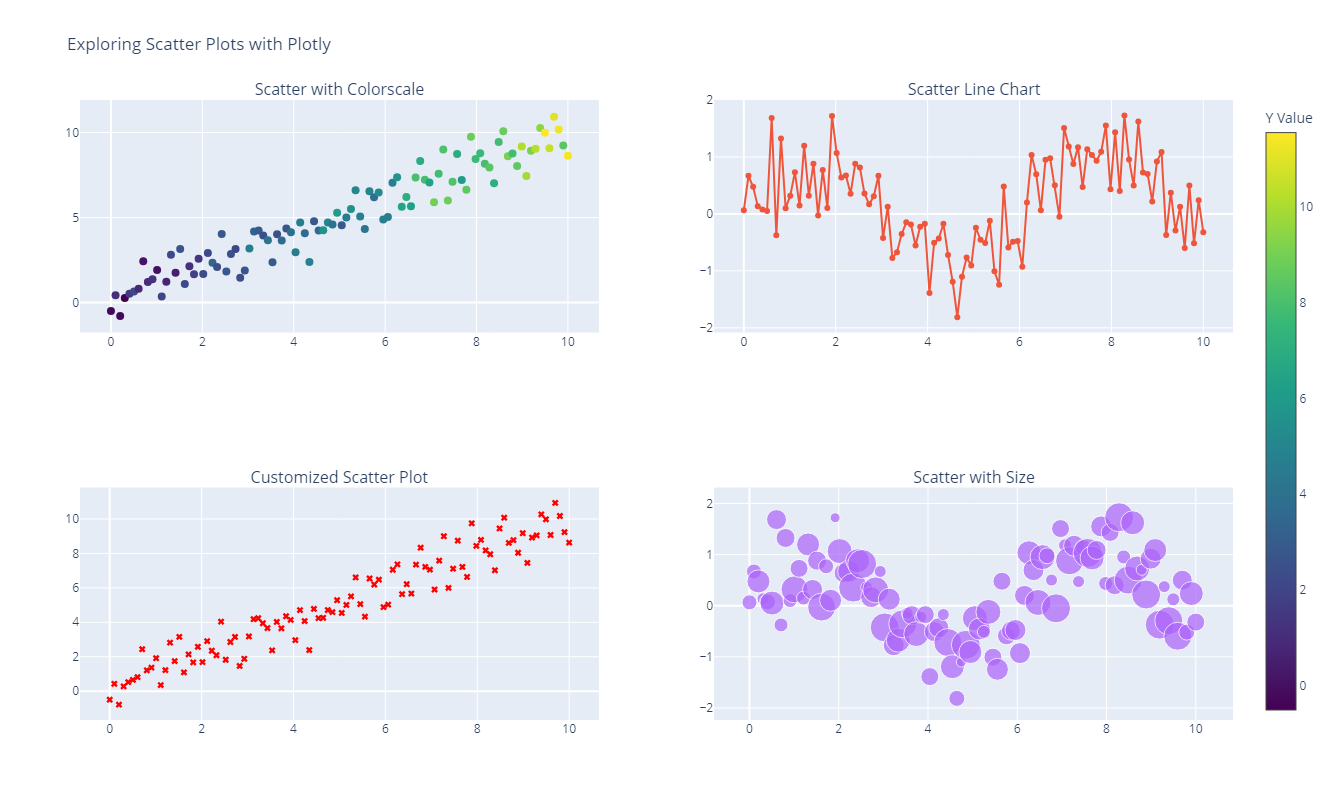

In [10]:
# Generate synthetic data
x = np.linspace(0, 10, 100)
y1 = x + np.random.normal(0, 1, 100)  # Linear relation with some noise
y2 = np.sin(x) + np.random.normal(0, 0.5, 100)  # Sinusoidal relation with some noise

# Create a subplot with 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Scatter with Colorscale', 
                                    'Scatter Line Chart',
                                    'Customized Scatter Plot',
                                    'Scatter with Size'))

# 1. Basic Scatter Plot
#fig.add_trace(go.Scatter(x=x, y=y1, mode='markers', name='Basic Scatter'), row=1, col=1)

# 1. Scatter with Colorscale
# Coloring the markers based on their y-values
fig.add_trace(go.Scatter(x=x, y=y1, mode='markers', marker=dict(color=y, colorscale='Viridis', size=8, colorbar=dict(title="Y Value")), name='Colored Scatter'), row=1, col=1)


# 2. Scatter Line Chart
# Connecting data points with lines
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Scatter Line'), row=1, col=2)

# 3. Customized Scatter Plot
# Changing marker color and symbol
fig.add_trace(go.Scatter(x=x, y=y1, mode='markers', marker=dict(color='red', symbol='x'), name='Customized Scatter'), row=2, col=1)

# 4. Scatter with Size
# Adjusting marker size based on another variable
size = np.random.randint(10, 30, 100)  # Random sizes for demonstration
fig.add_trace(go.Scatter(x=x, y=y2, mode='markers', marker=dict(size=size), name='Scatter with Size'), row=2, col=2)

# Update layout and display
fig.update_layout(title_text="Exploring Scatter Plots with Plotly",  width=1200, height=800, showlegend=False)
fig.show()

### 3.4. Pie Charts with Plotly

Pie charts are a type of data visualization that represents the proportions of different categories as slices of a circle. The size of each slice corresponds to its proportion of the whole.

**Introduction and use-cases**

- **Proportional Analysis**: When you want to visualize the proportion of categories, like market share of different companies.
  
- **Budget Analysis**: Representing how a budget is distributed across different departments or expenses.
  
- **Survey Results**: Displaying the results of a single-choice survey question.

**Basic Pie Charts**

Plotly provides an intuitive way to create interactive pie charts that allow for hovering to view additional information.




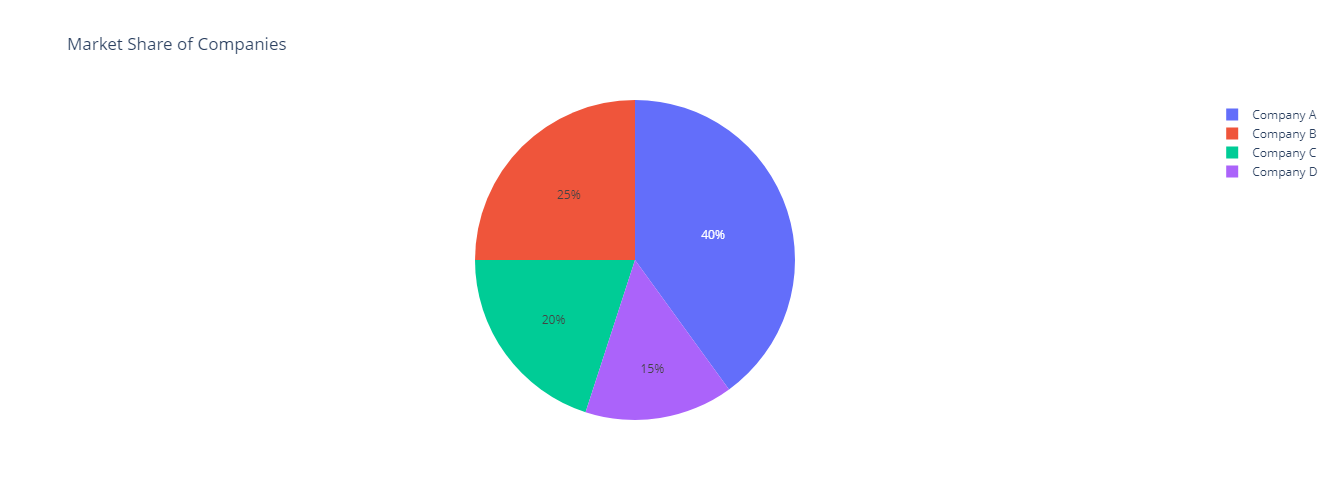

In [11]:
# Import necessary libraries
import plotly.express as px

# Sample data for the pie chart
# This data represents the market share of different companies
companies = ['Company A', 'Company B', 'Company C', 'Company D']
market_share = [40, 25, 20, 15]

# Creating the basic Pie Chart
fig = px.pie(values=market_share, names=companies, title="Market Share of Companies",width=800, height=500)

# Display the chart
fig.show()


**Customizing the Pie Charts**

Customizations include adjusting slice colors, adding labels, and controlling the overall appearance.

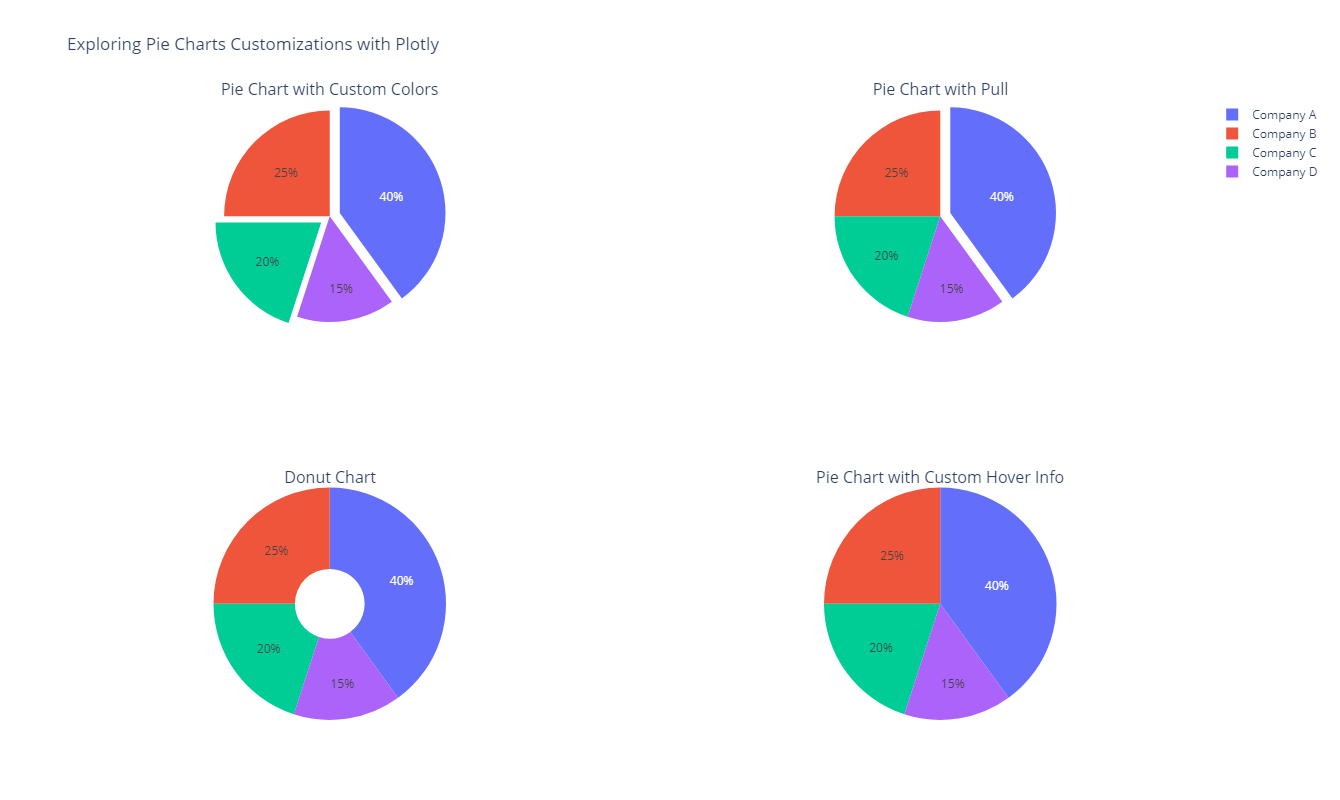

In [13]:
# Import necessary libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data for the pie chart
companies = ['Company A', 'Company B', 'Company C', 'Company D']
market_share = [40, 25, 20, 15]

# Create a subplot layout for pie charts
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}], 
                           [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Pie Chart with Custom Colors',
                                    'Pie Chart with Pull',
                                    'Donut Chart',
                                    'Pie Chart with Custom Hover Info'))

# 1. Pie Chart with Exploded Slices
# 'Exploding' the slices for 'Company A' and 'Company C'
explode = [0.1, 0, 0.1, 0]  # 'Company A' and 'Company C' will be separated from the main pie
fig.add_trace(go.Pie(labels=companies, values=market_share, pull=explode, name='Exploded Slices Pie Chart'), row=1, col=1)

# 2. Pie Chart with Pull
# 'Pull' can be used to highlight a segment of the pie chart
pull = [0.1, 0, 0, 0]  # 'Company A' will be pulled out by 10%
fig.add_trace(go.Pie(labels=companies, values=market_share, pull=pull, name='Pie Chart with Pull'), row=1, col=2)

# 3. Donut Chart
fig.add_trace(go.Pie(labels=companies, values=market_share, hole=0.3, name='Donut Chart'), row=2, col=1)

# 4. Pie Chart with Custom Hover Info
hoverinfo = ["Company: {}<br>Market Share: {}%".format(company, share) for company, share in zip(companies, market_share)]
fig.add_trace(go.Pie(labels=companies, values=market_share, hoverinfo="text", hovertext=hoverinfo, name='Custom Hover Info Pie Chart'), row=2, col=2)

# Update layout with a title
fig.update_layout(title_text="Exploring Pie Charts Customizations with Plotly",width=1500, height=800)

# Display the combined pie charts with all customizations
fig.show()

### 3.3. Bar Plots with Plotly

Bar plots, or bar charts, are a type of chart that represents categorical data with rectangular bars. The lengths of the bars are proportional to the values they represent.

**Introduction and use-cases**

- **Comparing Categories**: Bar plots are especially effective when you have data that can be split into multiple categories and you want to compare these categories side by side.

- **Visualizing Distributions**: They can also represent the distribution of data over several groups.

- **Showing Trends**: Bar charts can be used for more complex comparisons of data with grouped bar charts and stacked bar charts.

**Basic Bar Chart**

A basic bar chart requires values for the x-axis (categories) and y-axis (values or counts for each category).



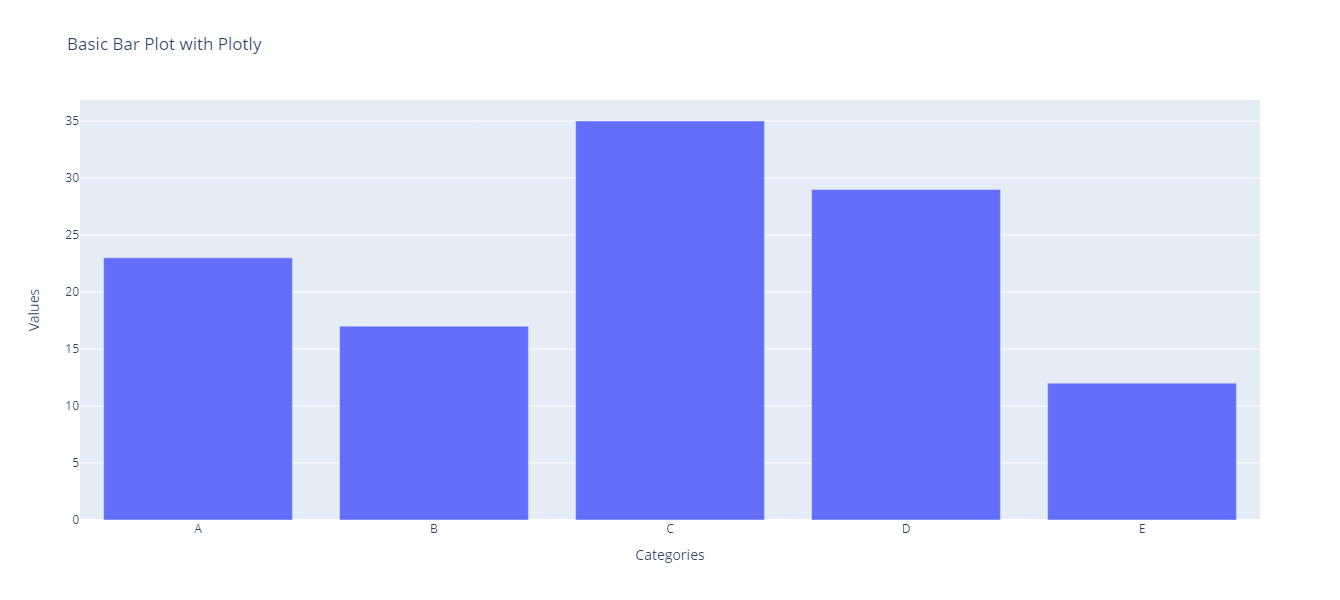

In [17]:
# Import necessary libraries
import plotly.graph_objects as go

# Sample data for the bar chart
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 17, 35, 29, 12]

# Creating the bar chart
fig = go.Figure(data=go.Bar(x=categories, y=values))

# Adding title and labels to the axes
fig.update_layout(title="Basic Bar Plot with Plotly",
                  xaxis_title="Categories",
                  yaxis_title="Values",
                 width=1000, height=600)  #width=1200, height=800

# Display the bar plot
fig.show()

**Customizing the Bar Chart**

Plotly provides various customization options for bar charts, such as changing colors, arranging bars, and adding patterns. We'll explore some of these customizations in the following examples.

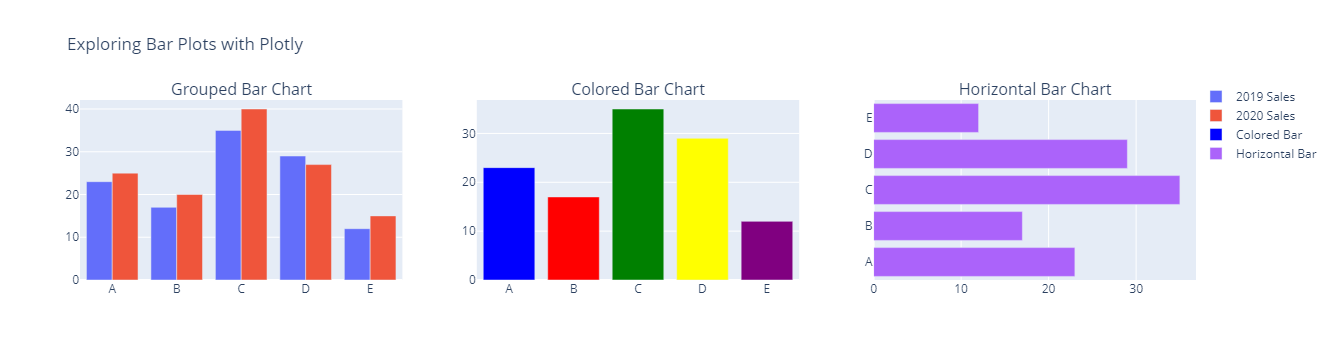

In [19]:
# Sample data for the bar chart
# 'categories' represent the different categories for our bar chart
# 'values_2019' and 'values_2020' represent sales data for 2019 and 2020, respectively
categories = ['A', 'B', 'C', 'D', 'E']
values_2019 = [23, 17, 35, 29, 12]
values_2020 = [25, 20, 40, 27, 15]

# Create a subplot with 1x3 layout
# This allows us to show the basic bar chart (now with grouped bars) alongside two customizations
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Grouped Bar Chart', 
                                    'Colored Bar Chart',
                                    'Horizontal Bar Chart'))

# 1. Grouped Bar Chart
# This represents sales data for both 2019 and 2020, grouped by categories
fig.add_trace(go.Bar(x=categories, y=values_2019, name='2019 Sales'), row=1, col=1)
fig.add_trace(go.Bar(x=categories, y=values_2020, name='2020 Sales'), row=1, col=1)

# 2. Colored Bar Chart
# Here, we customize the colors of the bars to make the chart more visually appealing
colors = ['blue', 'red', 'green', 'yellow', 'purple']
fig.add_trace(go.Bar(x=categories, y=values_2019, marker_color=colors, name='Colored Bar'), row=1, col=2)

# 3. Horizontal Bar Chart
# Instead of vertical bars, we switch the x and y axes to display horizontal bars
# This can be useful for different data presentations or to better fit long category names
fig.add_trace(go.Bar(y=categories, x=values_2019, orientation='h', name='Horizontal Bar'), row=1, col=3)

# Update layout with a title and adjust the legend position
fig.update_layout(title_text="Exploring Bar Plots with Plotly", showlegend=True, legend=dict(x=1, y=1.1))

# Display the combined bar plot with all customizations
fig.show()

### 3.4. Histogram Plots with Plotly

A histogram is a representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. Histograms partition the range of the data into a series of intervals (or "bins") and then count how many data points fall into each bin.

**Introduction and use-cases**

- **Data Distribution**: Histograms provide a visual interpretation of numerical data by showing the number of data points that fall within a range of values. This can help in understanding the underlying frequency distribution of the data.

- **Identifying Skewness**: A histogram can show whether data is symmetrically distributed or skewed to the left or right.

- **Spotting Outliers**: Outliers can be more easily identified with a histogram.

**Basic Histogram Chart**

A basic histogram requires only a single variable. The range of this variable gets divided into a series of intervals, and the count of data points that fall into each interval are represented by bars.


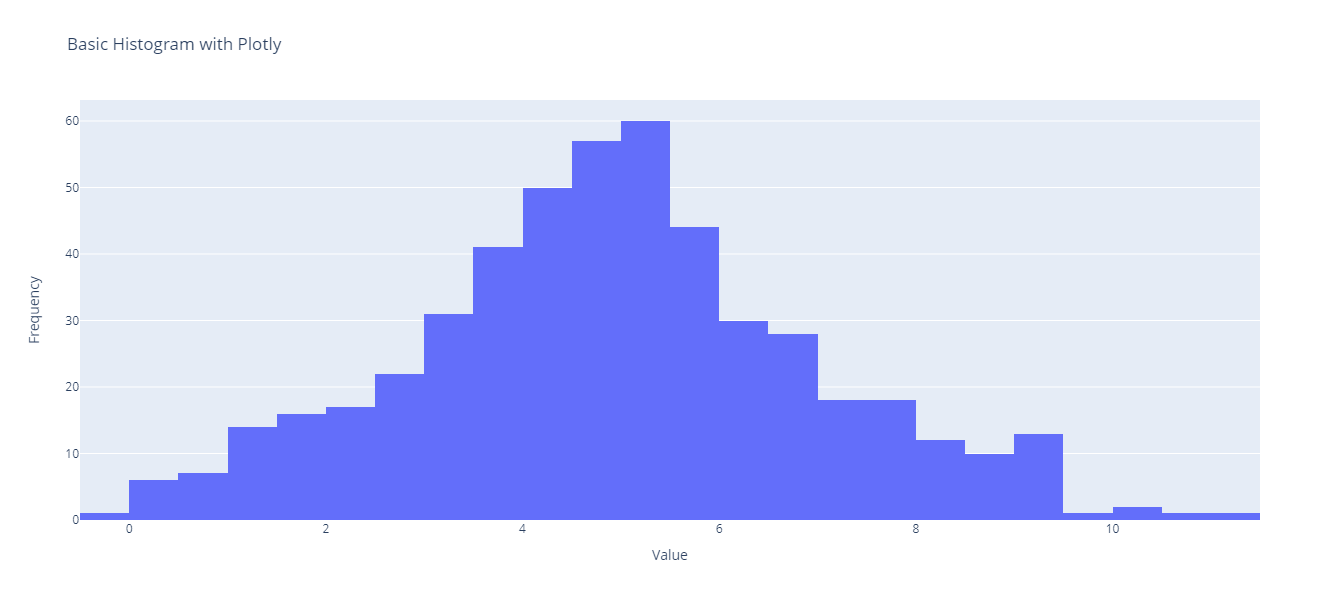

In [23]:
# Generate synthetic data for the histogram
# This creates a dataset of 500 points, normally distributed around the mean value of 5 and with a standard deviation of 2
data = np.random.normal(5, 2, 500)

# Creating the basic histogram
fig = go.Figure(data=go.Histogram(x=data))

# Adding title and labels to the axes for clarity
fig.update_layout(title="Basic Histogram with Plotly",
                  xaxis_title="Value",
                  yaxis_title="Frequency",
                 width=1000, height=600)

# Display the histogram
fig.show()

**Customizing the Histogram Chart**

Plotly provides extensive customization options for histograms, such as adjusting bin sizes, adding patterns, and more. We'll explore some of these customizations in the following examples.

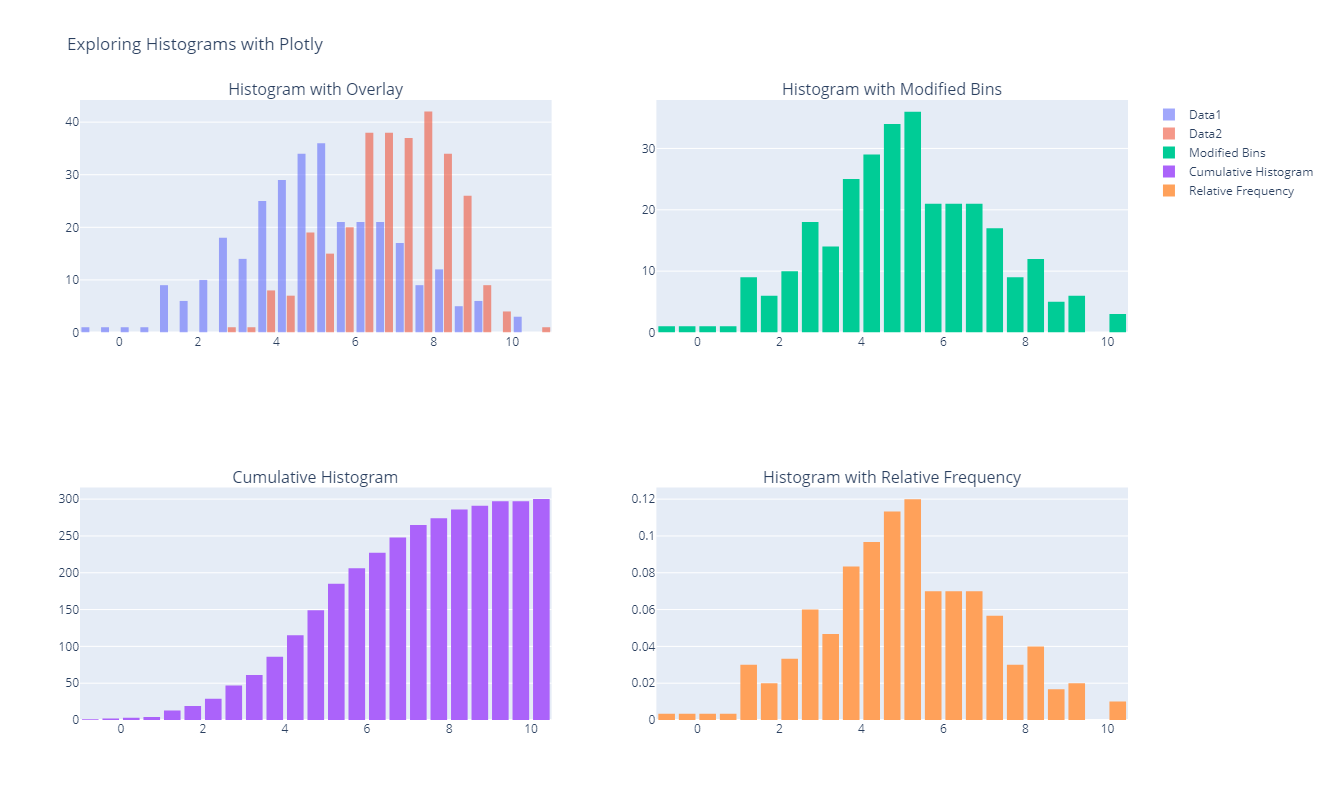

In [24]:
# Generating synthetic data for the histograms
# First dataset: 300 points, normally distributed around the value 5 with a standard deviation of 2
data1 = np.random.normal(5, 2, 300)

# Second dataset: 300 points, normally distributed around the value 7 with a standard deviation of 1.5
data2 = np.random.normal(7, 1.5, 300)

# Create a subplot with 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Histogram with Overlay',
                                    'Histogram with Modified Bins',
                                    'Cumulative Histogram',
                                    'Histogram with Relative Frequency'))

# 1. Histogram with Overlay
# Comparing two sets of data in the same histogram
fig.add_trace(go.Histogram(x=data1, opacity=0.6, name='Data1'), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, opacity=0.6, name='Data2'), row=1, col=1)

# 2. Histogram with Modified Bins
# Specifying the size of the bins to be 0.5
fig.add_trace(go.Histogram(x=data1, xbins=dict(size=0.5), name='Modified Bins'), row=1, col=2)

# 3. Cumulative Histogram
# Displaying the cumulative count of data points up to each bin
fig.add_trace(go.Histogram(x=data1, cumulative_enabled=True, name='Cumulative Histogram'), row=2, col=1)

# 4. Histogram with Relative Frequency
# Displaying the proportion of data points in each bin rather than the absolute count
fig.add_trace(go.Histogram(x=data1, histnorm='probability', name='Relative Frequency'), row=2, col=2)

# Update layout with a title and adjust the legend position
fig.update_layout(title_text="Exploring Histograms with Plotly", showlegend=True, bargap=0.1, bargroupgap=0.1,width=1500, height=800)

# Display the combined histogram plots with all customizations
fig.show()

### 3.5. Box Plots with Plotly

A box plot (or box-and-whisker plot) displays a summary of a set of data values. It provides properties like the minimum, first quartile, median, third quartile, and maximum. The box represents the interquartile range, and the whiskers extend to the rest of the distribution.

**Introduction and use-cases**

- **Data Distribution**: Box plots provide a bird's-eye view of the distribution of the data, highlighting potential outliers and the central tendency of the data.

- **Comparing Groups**: Multiple box plots can be used side by side to compare the distribution of data across different groups or categories.

- **Identifying Outliers**: Box plots are excellent tools for spotting outliers in the dataset.

**Basic Box Chart**

A basic box plot requires only a single variable. The plot will display the distribution of this variable.



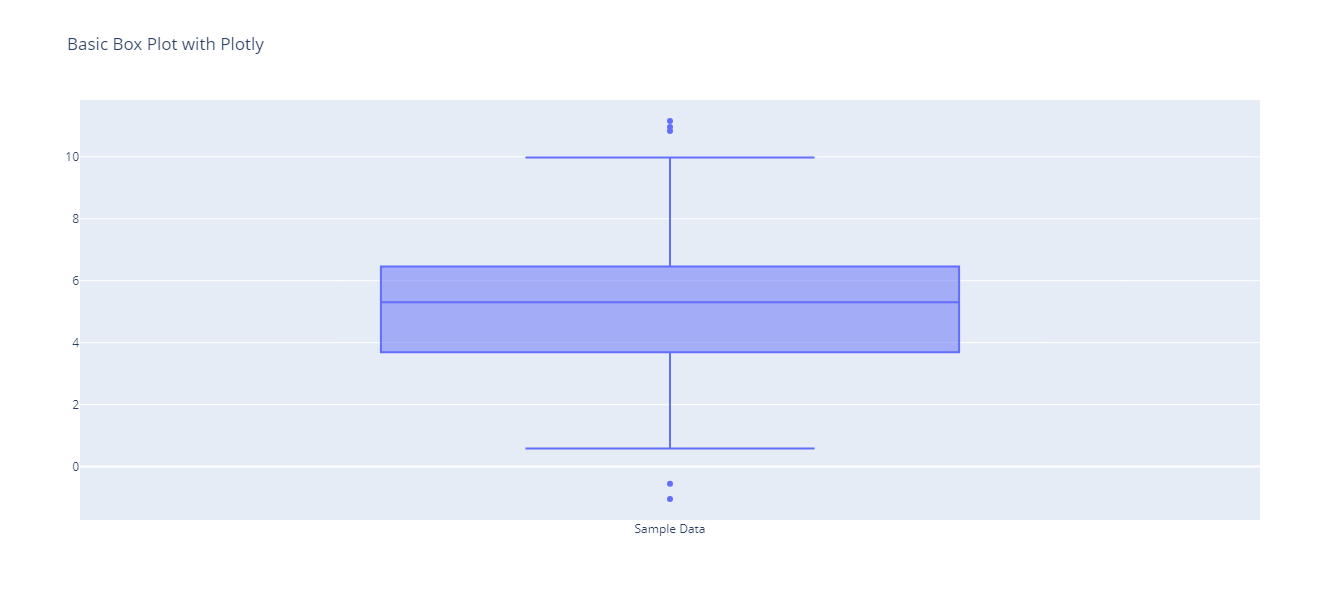

In [25]:
# Import necessary libraries
import plotly.graph_objects as go
import numpy as np

# Generate synthetic data for the box plot
# This creates a dataset of 200 points, normally distributed around the mean value of 5 and with a standard deviation of 2
data = np.random.normal(5, 2, 200)

# Creating the basic box plot
fig = go.Figure(data=go.Box(y=data, name='Sample Data'))

# Adding a title for clarity
fig.update_layout(title="Basic Box Plot with Plotly",width=1000, height=600)

# Display the box plot
fig.show()

This code creates a basic box plot, which provides a visual summary of the data values. The central box of the plot represents the interquartile range (IQR) — the range between the 25th percentile (Q1) and the 75th percentile (Q3). The line inside the box is the median (Q2 or 50th percentile). The "whiskers" extend to the smallest and largest data points within 1.5 * IQR from Q1 and Q3, respectively. Any data points outside of this range are considered outliers and are displayed as individual points.

**Customizing the Box Chart**

Plotly offers various customization options for box plots, such as adding jitter points, changing colors, and more. We'll explore some of these customizations in the following examples.

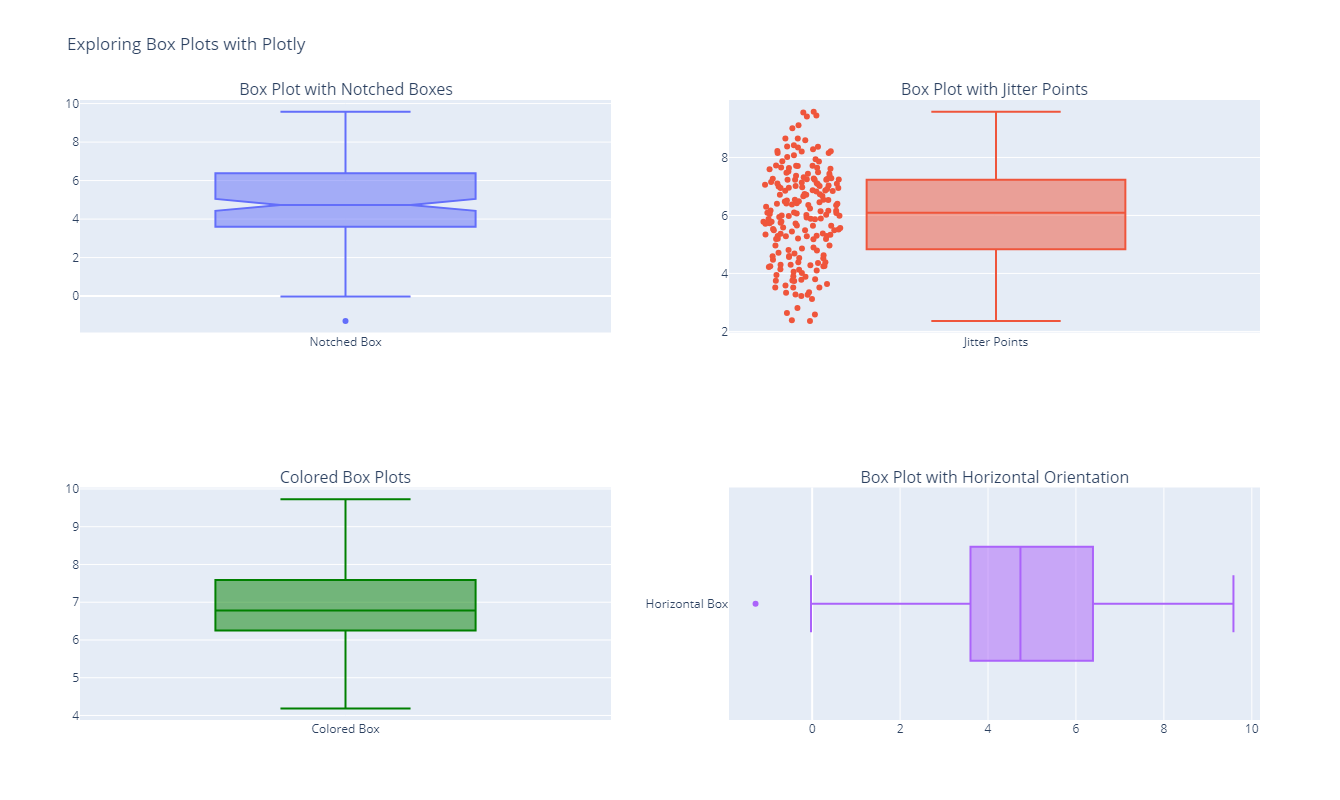

In [26]:
# Generating synthetic data for the box plots
# Three datasets, each normally distributed but with different means and standard deviations
data_A = np.random.normal(5, 2, 200)
data_B = np.random.normal(6, 1.5, 200)
data_C = np.random.normal(7, 1, 200)

# Create a subplot with 2x2 layout
# This allows us to display multiple box plot customizations side by side
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Box Plot with Notched Boxes',
                                    'Box Plot with Jitter Points',
                                    'Colored Box Plots',
                                    'Box Plot with Horizontal Orientation'))

# 1. Box Plot with Notched Boxes
# Displaying the distribution of data_A with notches
fig.add_trace(go.Box(y=data_A, notched=True, name='Notched Box'), row=1, col=1)

# 2. Box Plot with Jitter Points
# Displaying individual data points along with the box plot using jitter
fig.add_trace(go.Box(y=data_B, boxpoints='all', jitter=0.3, name='Jitter Points'), row=1, col=2)

# 3. Colored Box Plots
# Customizing the color of the box plot
fig.add_trace(go.Box(y=data_C, boxpoints=False, line=dict(color='green'), name='Colored Box'), row=2, col=1)

# 4. Box Plot with Horizontal Orientation
# Changing the orientation of the box plot
fig.add_trace(go.Box(x=data_A, orientation='h', name='Horizontal Box'), row=2, col=2)

# Update layout with a title and adjust the legend position
fig.update_layout(title_text="Exploring Box Plots with Plotly", showlegend=False, width=1200, height=800)

# Display the combined box plot with all customizations
fig.show()

In this code, we have showcased four different customizations of box plots side by side: notched boxes, jitter points, colored boxes, and horizontal orientation. This provides a comprehensive overview of some of the customization options available with Plotly box plots.

### 3.6. Heatmaps with Plotly

Heatmaps are used to represent data in a 2D space using colors. The variations in coloring of a heatmap represent the underlying values of the data in that region. This makes heatmaps useful for visualizing the distribution of data across two dimensions.

**Introduction and use-cases**

- **Data Density**: Heatmaps can represent the density of data points in a 2D space.
  
- **Correlation**: They are often used to visualize correlation matrices, which show how pairs of variables in a dataset relate to one another.

- **Spatial Distribution**: In geographical heatmaps, data can be distributed across a map to show the concentration of certain values in different geographical areas.

**Basic Heatmap**

A basic heatmap requires a matrix of values which are then mapped to colors.



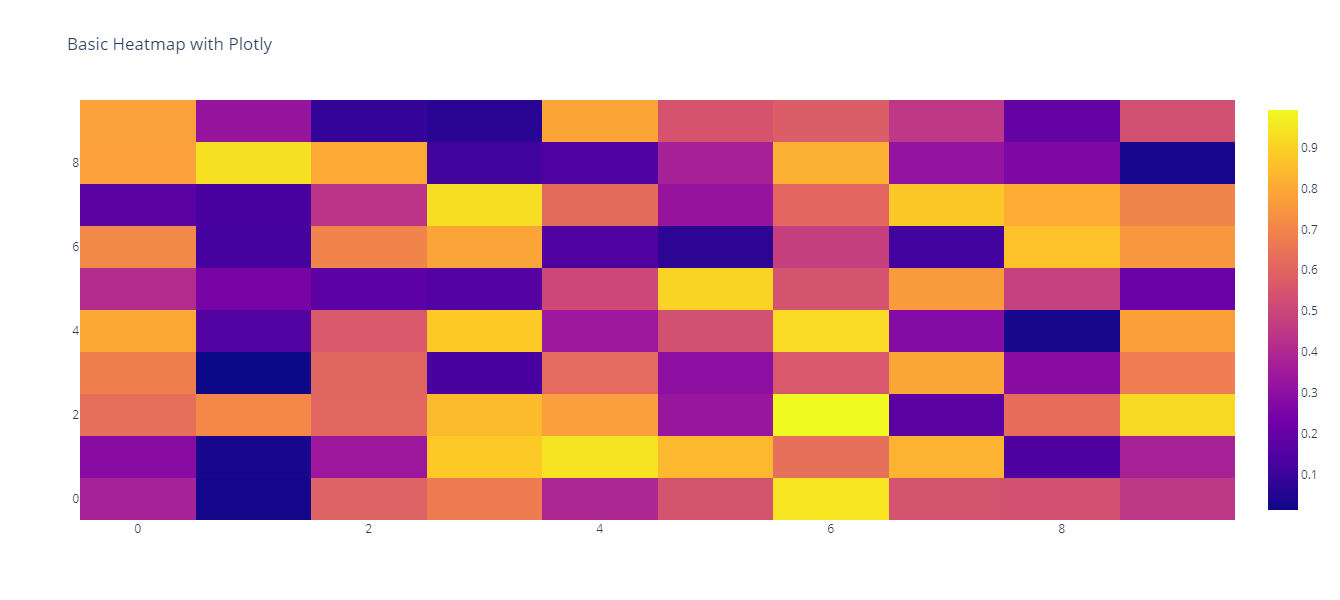

In [29]:
# Generate synthetic data for the heatmap
# This creates a 10x10 matrix with random values between 0 and 1
data = np.random.rand(10, 10)

# Creating the basic heatmap
fig = go.Figure(data=go.Heatmap(z=data))

# Adding a title for clarity
fig.update_layout(title="Basic Heatmap with Plotly",width=600, height=600)

# Display the heatmap
fig.show()

**Customizing the Heatmap**

Plotly provides extensive customization options for heatmaps, such as changing color scales, adding annotations, and more. We'll explore some of these customizations in the following examples.

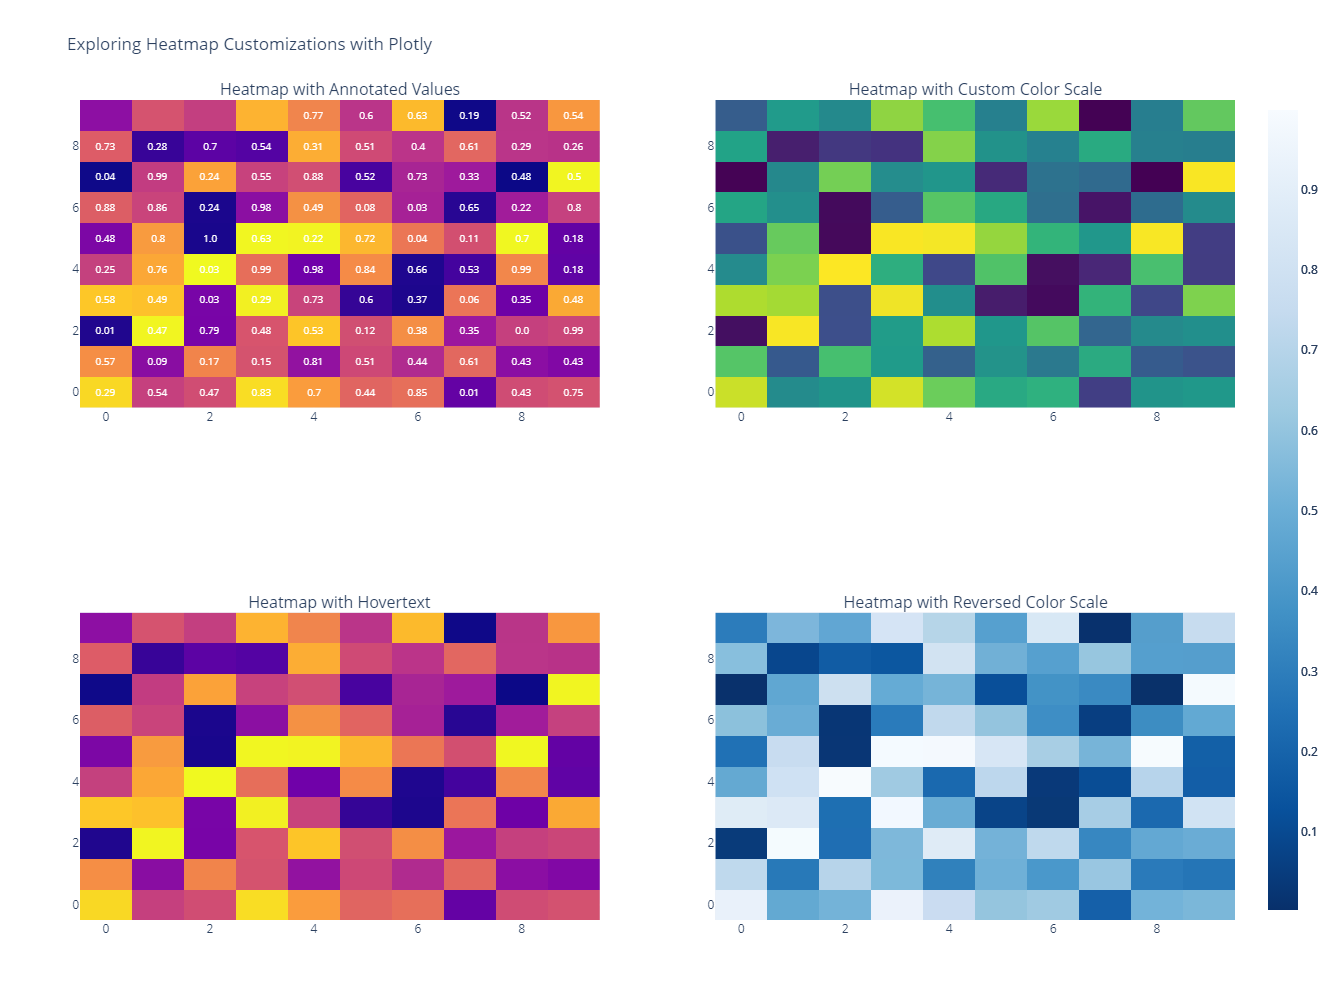

In [30]:
# Generating synthetic data for the heatmap
# Creating a 10x10 matrix with random values between 0 and 1
data = np.random.rand(10, 10)

# Create a subplot with 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Heatmap with Annotated Values',
                                    'Heatmap with Custom Color Scale',
                                    'Heatmap with Hovertext',
                                    'Heatmap with Reversed Color Scale'))

# 1. Heatmap with Annotated Values
# Annotating the heatmap with the exact values from the data matrix
heatmap_annotated = go.Heatmap(z=data, showscale=False)
fig.add_trace(heatmap_annotated, row=1, col=1)

# Adjusting annotations to appear over the correct subplot
annotations = []
for i, row in enumerate(data):
    for j, val in enumerate(row):
        annotations.append(go.layout.Annotation(text=str(round(val, 2)), x=j, y=9-i, xref="x1", yref="y1", font=dict(color='white', size=10), showarrow=False))
fig.update_layout(annotations=annotations)

# 2. Heatmap with Custom Color Scale
# Using the 'Viridis' color scale
fig.add_trace(go.Heatmap(z=data, colorscale='Viridis'), row=1, col=2)

# 3. Heatmap with Hovertext
# Providing custom hover text for each cell of the heatmap
hovertext = [['Value: {:.2f}'.format(val) for val in row] for row in data]
fig.add_trace(go.Heatmap(z=data, hovertext=hovertext, hoverinfo='text'), row=2, col=1)

# 4. Heatmap with Reversed Color Scale
# Reversing the default color scale
fig.add_trace(go.Heatmap(z=data, colorscale='Blues_r'), row=2, col=2)

# Update layout with a title and adjust the size
fig.update_layout(title_text="Exploring Heatmap Customizations with Plotly",width=1000, height=1000)

# Display the combined heatmap plots with all customizations
fig.show()

### 3.4. Bubble Maps with Plotly

Bubble maps are a type of data visualization that uses circles to represent data values in two-dimensional space. The size of the circle (or bubble) can be used to represent a third variable, making it a form of three-variable visualization.

**Introduction and use-cases**

- **Geographical Analysis**: When you want to visualize data that has a geographical component, such as the population of cities or the number of incidents in different regions.

- **Comparisons**: Bubble maps can be useful for comparing two or more datasets side by side.

- **Economic Data**: Displaying GDP, population, and other economic indicators for different countries or regions.

**Basic Bubble Maps**

Using Plotly, we can create interactive bubble maps that allow for zooming, panning, and hovering to view additional information.



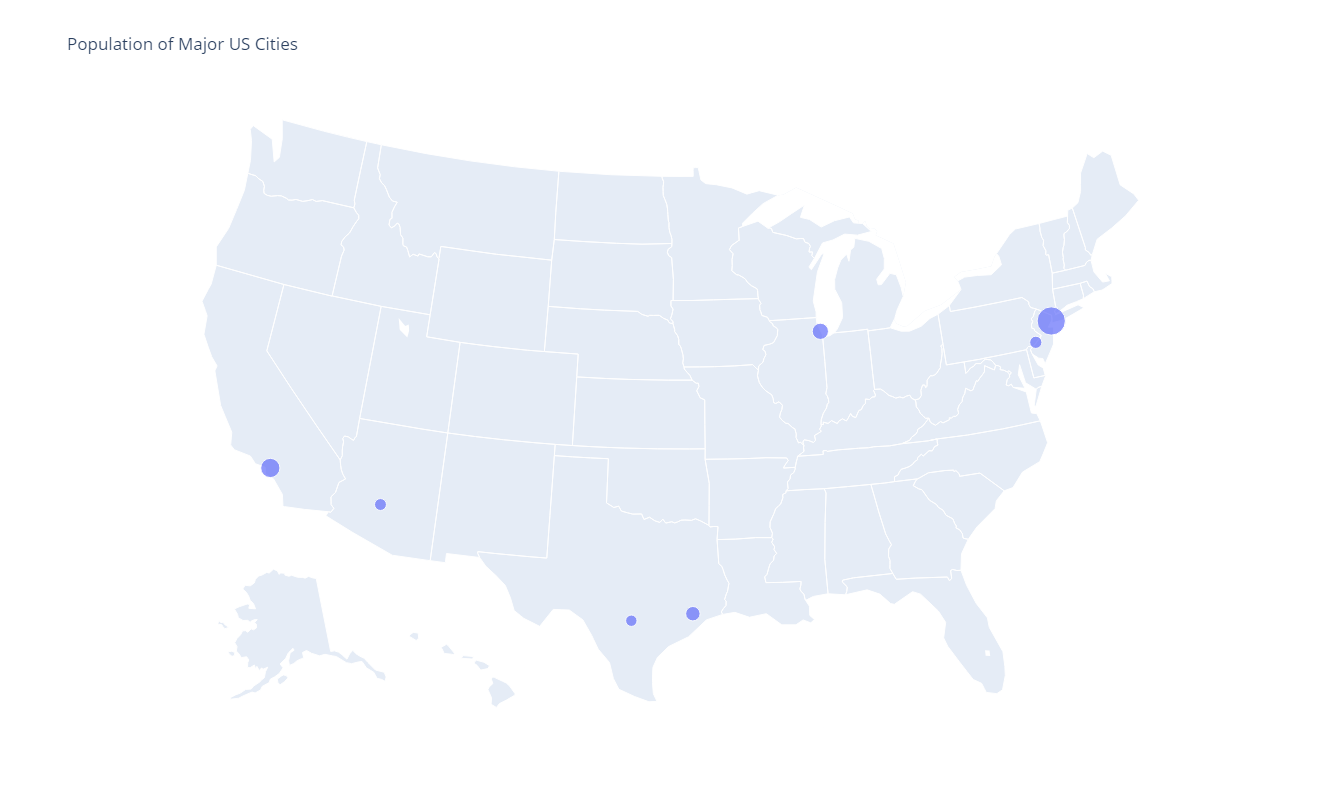

In [32]:
# Import necessary libraries
import plotly.express as px

# Sample data for the bubble map
# This data represents the population of some major cities in the world
cities = {
    "city": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio"],
    "lat": [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 39.9526, 29.4241],
    "lon": [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -75.1652, -98.4936],
    "population": [8175133, 3792621, 2695598, 2129784, 1445632, 1526006, 1327407]
}

# Creating the basic Bubble Map
fig = px.scatter_geo(cities, lat="lat", lon="lon", size="population", scope="usa",
                     hover_name="city", title="Population of Major US Cities",width=1000, height=800)

# Display the map
fig.show()

## Customizing the Bubble Maps

Customizations include adjusting the color and size of the bubbles, adding hover text, and controlling the map's appearance.

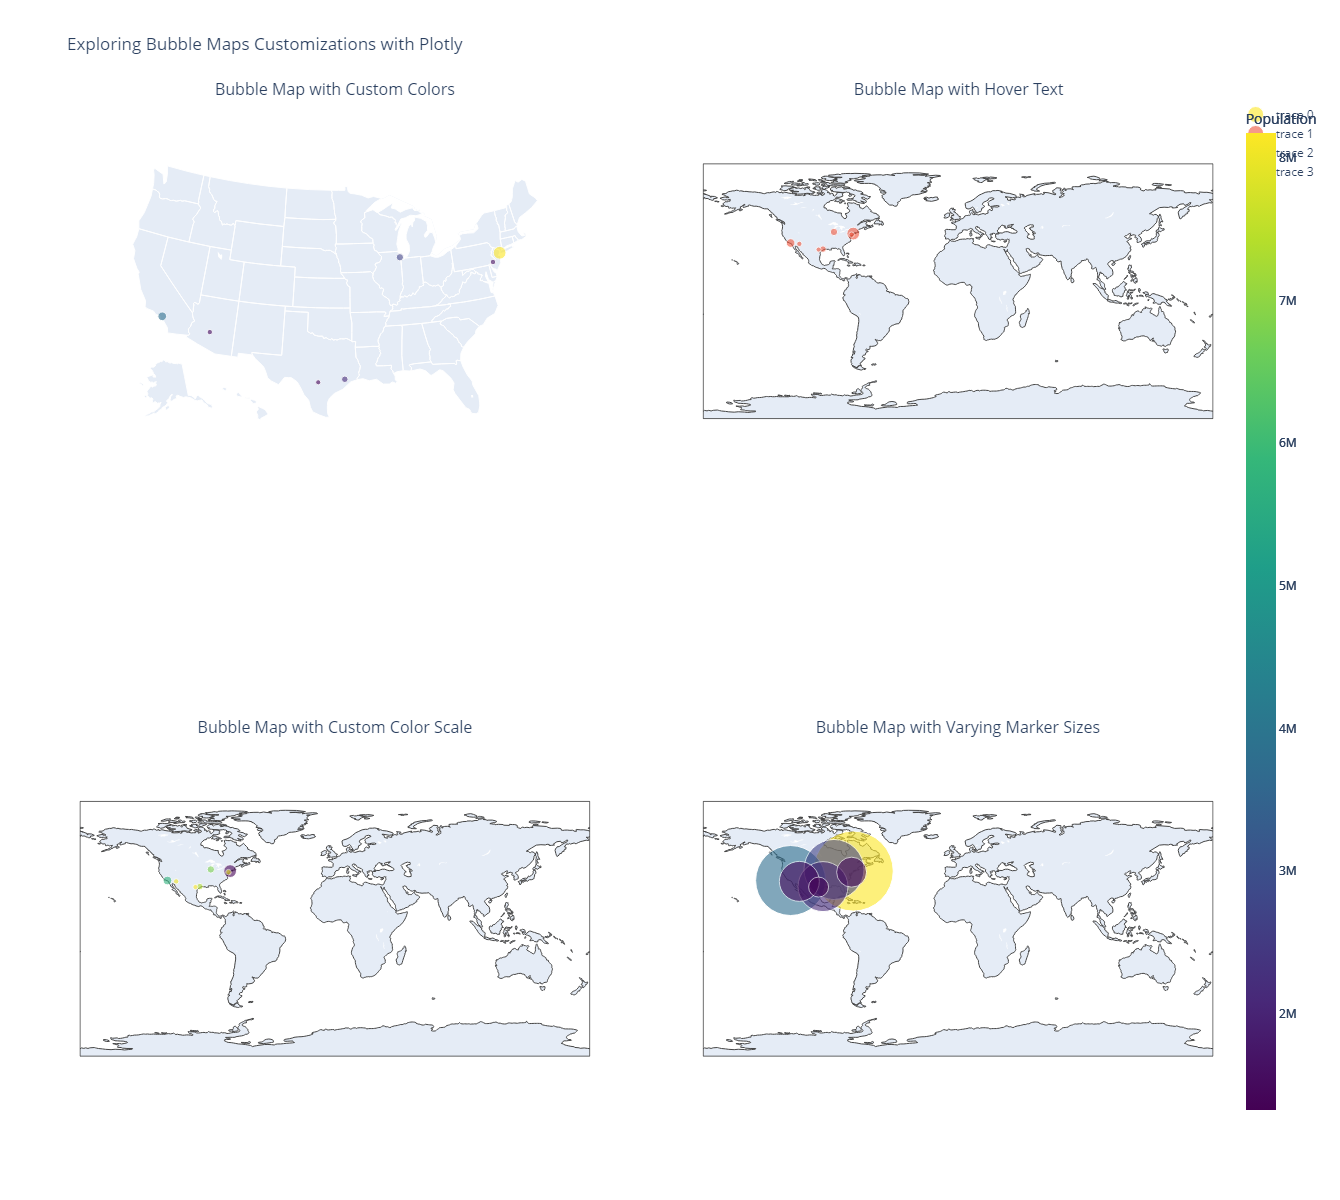

In [33]:
# Import necessary libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data for the bubble map
cities = {
    "city": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio"],
    "lat": [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 39.9526, 29.4241],
    "lon": [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -75.1652, -98.4936],
    "population": [8175133, 3792621, 2695598, 2129784, 1445632, 1526006, 1327407],
    "size": [80, 70, 60, 50, 40, 30, 20]  # Custom sizes for markers
}

# Create a subplot with 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Bubble Map with Custom Colors',
                                    'Bubble Map with Hover Text',
                                    'Bubble Map with Custom Color Scale',
                                    'Bubble Map with Varying Marker Sizes'),
                    specs=[[{'type': 'scattergeo'}, {'type': 'scattergeo'}],
                           [{'type': 'scattergeo'}, {'type': 'scattergeo'}]])

# 1. Bubble Map with Custom Colors
fig.add_trace(go.Scattergeo(lat=cities["lat"], lon=cities["lon"], mode='markers', text=cities["city"],
                             marker=dict(size=cities["population"], sizemode='area', sizeref=100000, opacity=0.6, color=cities["population"], colorscale="Viridis", colorbar_title="Population")),
              row=1, col=1)

# 2. Bubble Map with Hover Text
hover_texts = ["City: {}<br>Population: {}".format(city, pop) for city, pop in zip(cities["city"], cities["population"])]
fig.add_trace(go.Scattergeo(lat=cities["lat"], lon=cities["lon"], mode='markers', text=hover_texts, hoverinfo="text",
                             marker=dict(size=cities["population"], sizemode='area', sizeref=100000, opacity=0.6)),
              row=1, col=2)

# 3. Bubble Map with Custom Color Scale (Reversed Viridis)
fig.add_trace(go.Scattergeo(lat=cities["lat"], lon=cities["lon"], mode='markers',
                             marker=dict(size=cities["population"], sizemode='area', sizeref=100000, opacity=0.6, color=cities["population"], colorscale="Viridis_r", colorbar_title="Population")),
              row=2, col=1)

# 4. Bubble Map with Varying Marker Sizes
fig.add_trace(go.Scattergeo(lat=cities["lat"], lon=cities["lon"], mode='markers', text=cities["city"],
                             marker=dict(size=cities["size"], opacity=0.6, color=cities["population"], colorscale="Viridis", colorbar_title="Population")),
              row=2, col=2)

# Update the layout
fig.update_layout(title_text="Exploring Bubble Maps Customizations with Plotly", geo=dict(scope='usa'), width=1500, height=1200)

# Display the figure
fig.show()

### 3.7. 3D Plots with Plotly

3D plots allow visualization of data in three dimensions. They can be particularly useful when you want to visualize relationships in datasets with three variables.

**Introduction and use-cases**

- **Multivariate Analysis**: When you have data with three key variables, 3D plots can be invaluable.
  
- **Spatial Analysis**: For data that has spatial characteristics, such as geographical data with altitude.

- **Scientific Computations**: In fields like physics or engineering, 3D plots can represent surfaces or gradients in three-dimensional space.

**Basic 3D Plots**

Plotly provides the ability to plot surfaces, scatter points, and lines in 3D space.



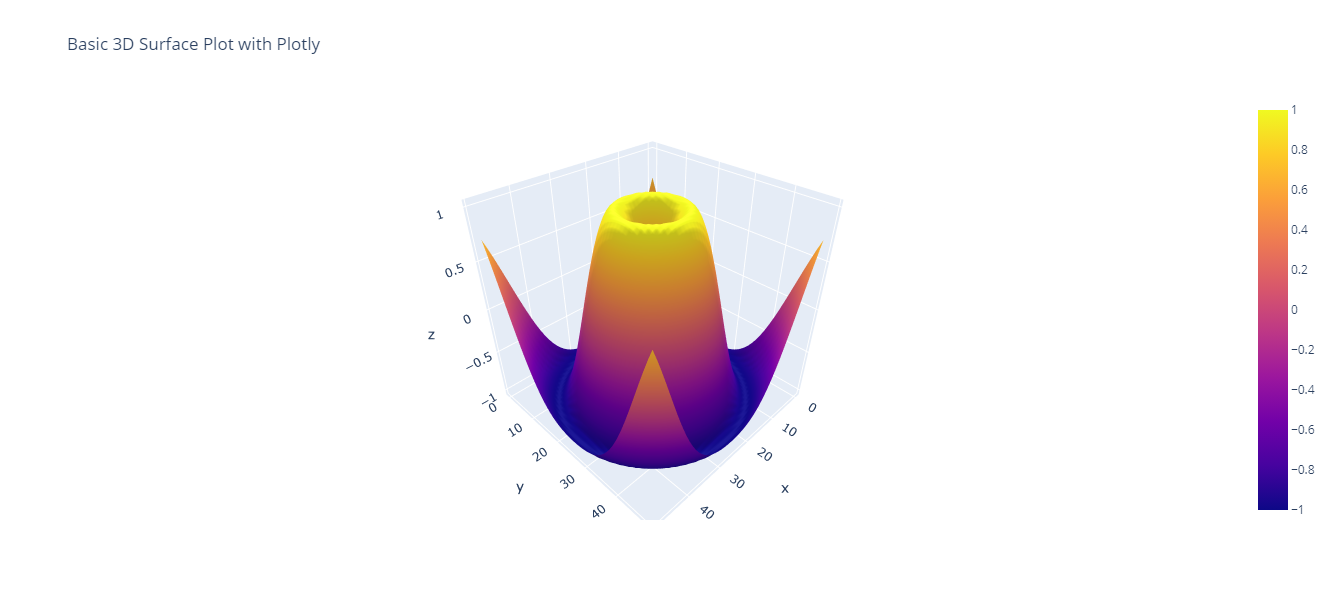

In [35]:
# Generating synthetic data for the 3D plot
# Using meshgrid to create a grid of x, y, and z values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))  # Using a simple function to generate z-values

# Creating the basic 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z)])

# Adding a title for clarity
fig.update_layout(title="Basic 3D Surface Plot with Plotly", width=600, height=600)

# Display the 3D plot
fig.show()

**Customizing the 3D Plots**

Customizations include adjusting the color scale, adding hover text, and controlling the layout and view angle.

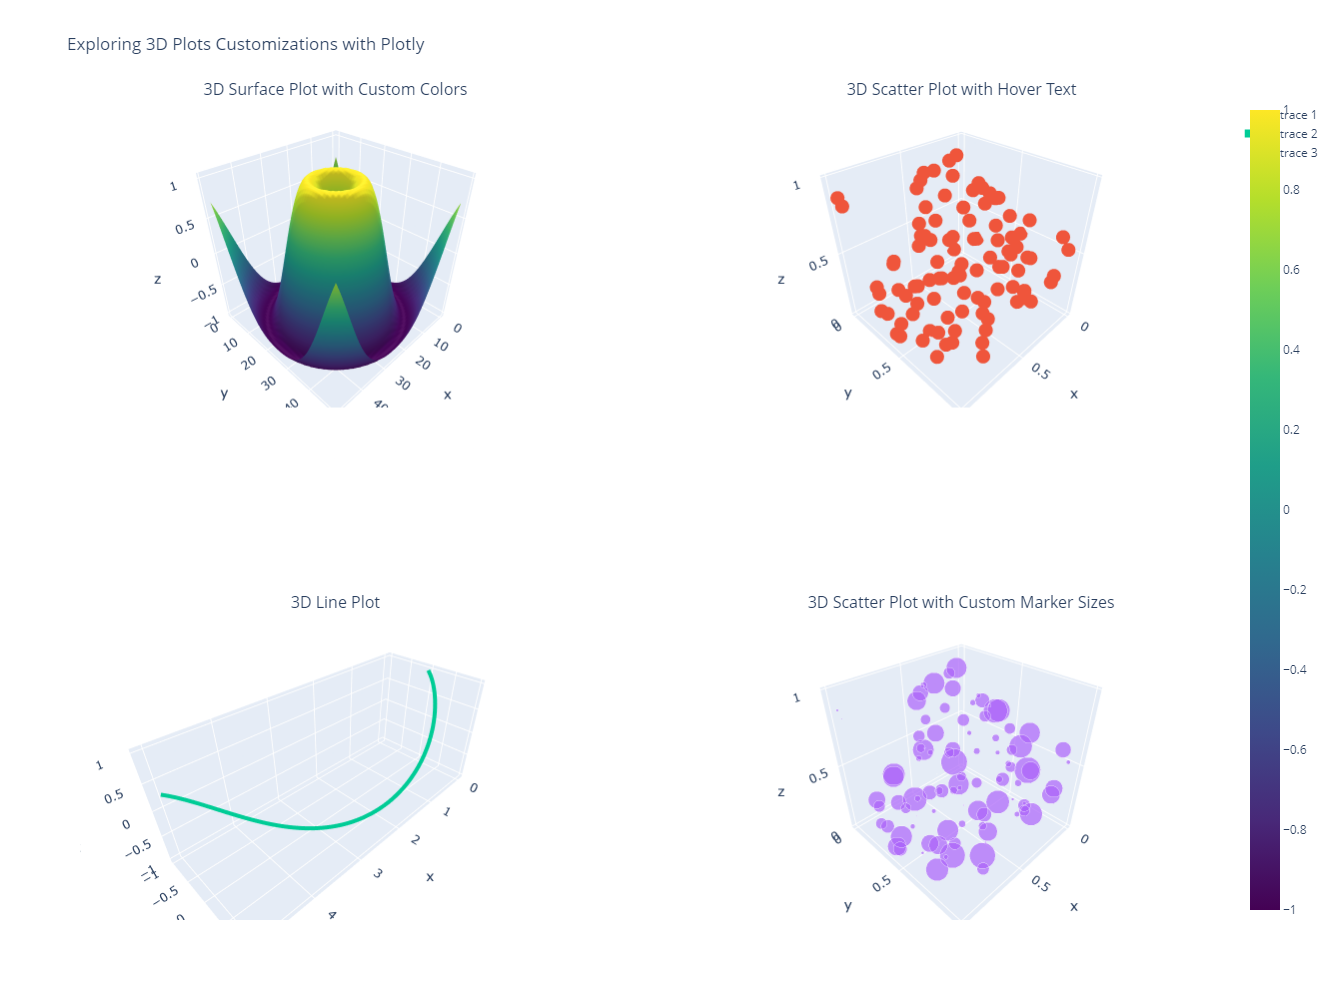

In [36]:
# Generating synthetic data for the 3D plots
# Using meshgrid to create a grid of x, y, and z values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create a subplot with 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type': 'surface'}, {'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                    subplot_titles=('3D Surface Plot with Custom Colors',
                                    '3D Scatter Plot with Hover Text',
                                    '3D Line Plot',
                                    '3D Scatter Plot with Custom Marker Sizes'))

# 1. 3D Surface Plot with Custom Colors
fig.add_trace(go.Surface(z=Z, colorscale='Viridis'), row=1, col=1)

# 2. 3D Scatter Plot with Hover Text
# Generating random data for scatter plot
scatter_data = np.random.rand(3, 100)
hovertext = ['Point {}: x={:.2f}, y={:.2f}, z={:.2f}'.format(i, scatter_data[0][i], scatter_data[1][i], scatter_data[2][i]) for i in range(100)]
fig.add_trace(go.Scatter3d(x=scatter_data[0], y=scatter_data[1], z=scatter_data[2], mode='markers', hovertext=hovertext), row=1, col=2)

# 3. 3D Line Plot
line_data = np.linspace(0, 5, 100)
fig.add_trace(go.Scatter3d(x=line_data, y=np.sin(line_data), z=np.cos(line_data), mode='lines', line=dict(width=8)), row=2, col=1)

# 4. 3D Scatter Plot with Custom Marker Sizes
sizes = np.random.rand(100) * 30
fig.add_trace(go.Scatter3d(x=scatter_data[0], y=scatter_data[1], z=scatter_data[2], mode='markers', marker=dict(size=sizes)), row=2, col=2)

# Update layout with a title and adjust the size
fig.update_layout(title_text="Exploring 3D Plots Customizations with Plotly", width=1000, height=1000)

# Display the combined 3D plots with all customizations
fig.show()

## Comparing Seaborn and Plotly 
---

### A Brief Introduction to Seaborn

Seaborn is a data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.

To get started with Seaborn, you first need to install it:
```python
!pip install seaborn

## Similarities and Differences

### Similarities:
- Both Seaborn and Plotly can be used to create a wide variety of visualizations.
- Both libraries are easy to use and integrate well with Pandas.

### Differences:
- **Interactivity**: Plotly visualizations are inherently interactive, while Seaborn visualizations are static.
- **Integration**: Plotly can be integrated into web applications using Dash. Seaborn doesn't have a similar framework.
- **Customization**: Plotly offers more flexibility in terms of customization and adjusting the appearance of plots.
- **Learning Curve**: Seaborn has a gentler learning curve for users familiar with matplotlib.

## Advantages of using Plotly
- **Interactivity**: Plotly's charts are interactive by default. Users can pan, zoom, and hover over chart elements to see more detail.
- **Web Integration with Dash**: Plotly can be integrated into web applications using Dash, providing a framework for building analytical web applications with Python.
- **Customizability**: Plotly offers a wide range of customization options, from adjusting chart colors to controlling the layout and appearance of plots.

## When to choose Seaborn vs. Plotly based on the task at hand

### Seaborn:
- When creating static visualizations for reports or academic papers.
- When you need quick and easy plots with minimal customization.
- When you're already familiar with matplotlib and need to extend its functionality.

### Plotly:
- When creating interactive visualizations for web applications.
- When the audience of your visualizations benefits from interactive features like zooming and panning.
- When you need advanced customizations or have specific layout requirements.


# Introduction to Dashboards using Dash in Jupyter Notebook

# 1. Introduction to Dash and its Importance

---

## What is a Dashboard?

A dashboard is a visual interface that provides users with a consolidated and interactive view of data, metrics, and other relevant information. It's designed to simplify complex datasets by presenting them in a digestible format, typically through charts, graphs, tables, and other visualizations.

Dashboards are commonly used in various sectors, from business intelligence and finance to healthcare and marketing, to gain insights, monitor key performance indicators (KPIs), and make data-driven decisions.

---

## Importance of Data Visualization

Visualization is crucial for understanding the vast amounts of data we deal with today. Here are some reasons why data visualization is essential:

1. **Quick Insights**: Visuals are processed faster by the human brain compared to rows of numbers.
2. **Complex Data Made Simple**: Helps to break down complex data structures into understandable visuals.
3. **Data-driven Decisions**: Makes it easier to spot patterns, trends, and outliers.
4. **Engagement**: Engages users more effectively than raw data.
5. **Storytelling**: A good visualization can tell a story about the data.

---

## Introduction to Dash by Plotly

[Dash by Plotly](https://plotly.com/dash/) is a Python framework for building analytical web applications. With Dash, you can create interactive, web-ready data visualizations with just Python (no JavaScript required!). Some features of Dash include:

- **Interactive Components**: Dash provides a suite of components for interactivity, including dropdowns, sliders, and more.
- **Customizable**: Style your apps with custom CSS, embed images, videos, and other media.
- **Easy to Use**: Designed for both novice and professional developers.
- **Integration with Plotly**: Dash seamlessly integrates with Plotly graphs.

Let's dive into some code to see Dash in action!

---

```python
# First, let's import necessary libraries
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Hello Dash!"),
    html.P("This is a simple Dash app."),
    dcc.Dropdown(
        id='dropdown-example',
        options=[
            {'label': 'Option 1', 'value': 'OPT1'},
            {'label': 'Option 2', 'value': 'OPT2'},
        ],
        value='OPT1'
    ),
    html.Div(id='dropdown-output')
])

# Define a callback to update the Div based on dropdown selection
@app.callback(
    Output('dropdown-output', 'children'),
    Input('dropdown-example', 'value')
)
def update_output(value):
    return f"You selected: {value}"

# Run the app (this line is required to see the output in a Jupyter notebook)
# app.run_server(mode='inline')  # Uncomment this line when executing in a Jupyter notebook environment


In [37]:
# Importing necessary libraries
import dash
from dash import dcc, html
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request
_send_jupyter_config_comm_request()

import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

# Create a new Dash app instance
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Hello Dash!"),
    html.P("This is a simple Dash web application.")
])

# Running the app (note: In Jupyter, this will not display the app. To view the app, run this in a Python script)
if __name__ == '__main__':
    app.run_server(host=IPAddr, port=8043)
    app.run_server(jupyter_mode="external",host=IPAddr, port=8048)

Dash app running on http://10.109.9.7:8048/


# 3. Basic Dash Layout

---

## Dash HTML Components

Dash HTML components allow you to create standard HTML elements such as divs, paragraphs, and headers. They're essentially a Pythonic way to represent HTML structures. You'll use these components to structure the overall layout of your app.

**Key Components**:
- `html.Div`: A container that can hold other components.
- `html.H1`, `html.H2`, ...: Headers of varying sizes.
- `html.P`: Paragraphs.

---

## Dash Core Components

Dash Core Components (DCC) provide higher-level components for creating interactive user interfaces. This includes graphs, sliders, dropdowns, and more.

**Key Components**:
- `dcc.Graph`: Display interactive data visualizations using Plotly.
- `dcc.Dropdown`: A dropdown menu to select one or more options.
- `dcc.Slider`: A slider for selecting numerical values or ranges.

---

## Layout Hierarchy and Styling

Your Dash app layout follows a hierarchy. Components can be nested within each other to achieve the desired structure. Styling can be applied using the `style` parameter, which accepts a dictionary of CSS properties and values.

For example:
```python
html.Div(style={'backgroundColor': 'lightgray'})

### Example: Create a Basic Dashboard Layout with Text, Dropdowns, and Sliders

In [39]:
from jupyter_dash import JupyterDash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    # Header
    html.H1("Basic Dash Dashboard", style={'textAlign': 'center'}),
    
    # Paragraph
    html.P("Select data preferences below:", style={'fontSize': 18}),
    
    # Dropdown with added margin at the bottom
    dcc.Dropdown(
        id='dropdown-example',
        options=[
            {'label': 'Option 1', 'value': 'OPT1'},
            {'label': 'Option 2', 'value': 'OPT2'},
        ],
        value='OPT1',
        style={'width': '50%', 'marginBottom': '40px'}
    ),
    
    # Slider
    dcc.Slider(
        id='slider-example',
        min=0,
        max=10,
        value=5,
        marks={i: str(i) for i in range(11)},
        step=0.1
    ),
    
    # Output for Slider
    html.Div(id='slider-output', style={'marginTop': 20})
])

@app.callback(
    dash.dependencies.Output('slider-output', 'children'),
    dash.dependencies.Input('slider-example', 'value')
)
def update_slider_output(value):
    return f'Slider Value: {value}'

app.run_server(host=IPAddr, port=8045, debug=True)  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(jupyter_mode="external",host=IPAddr, port=8046)


Dash app running on http://10.109.9.7:8046/


# 4. Linking Data to Dashboards

---

## The Concept of Callbacks

Callbacks in Dash allow you to make your apps interactive. They are Python functions that you define to automatically get called when inputs change, so you can update the rest of the UI based on those inputs.

**Key Concepts**:
- **Inputs and Outputs**: Every callback has inputs and outputs, which are defined using the `Input` and `Output` classes from `dash.dependencies`. The `Output` defines which component should be updated, and the `Input` defines which component(s) the callback listens to for changes.
- **Function Definition**: The body of the callback function describes what should happen when the input changes. The return value of the function is used to update the component defined in the `Output`.

---

## Reading Data into Dash Apps

Dash apps can read data in various ways, such as from CSV files, databases, or Python libraries. In this section, we'll use the `sklearn` library to load the Iris dataset.

---

## Updating Dashboard Components with Data

After loading data, you'll often want to present it in some form on your dashboard. This could be in the form of tables, graphs, or other visual representations. Dash provides components like `dash_table.DataTable` to help with this.

---

### Example: Load the Iris Dataset from the `sklearn` Library and Display the First Few Rows in a Dash DataTable


In [40]:
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Iris Dataset", style={'textAlign': 'center'}),
    
    html.P("Displaying the first few rows of the Iris dataset:", style={'fontSize': 18}),
    
    # Dash DataTable to display Iris data
    dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in df_iris.columns],
        data=df_iris.head().to_dict('records')  # Displaying only the first few rows
    )
])

app.run_server(host=IPAddr, port=8046, debug=True)  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(jupyter_mode="external",host=IPAddr, port=8047)

Dash app running on http://10.109.9.7:8047/


# 5. Interactive Data Visualization with Plotly

---

## Introduction to Plotly Graphs

Plotly is a powerful graphing library that lets you create rich, interactive graphs with just a few lines of Python code. Its integration with Dash means that these interactive graphs can be easily embedded within web applications.

**Key Concepts**:
- **Graph Objects**: Plotly provides various graph objects like `Scatter`, `Bar`, and `Pie` to create different types of visualizations.
- **Customization**: Almost every aspect of a Plotly graph can be customized, from axis labels to marker colors.

---

## Interactivity Features of Plotly

One of the strengths of Plotly is its built-in interactivity. Without any extra coding, users can:
- **Pan and Zoom**: Explore different parts of the graph.
- **Hover**: Get detailed information about specific data points.
- **Toggle traces**: Click on legend items to show/hide traces.

---

## Embedding Plotly Graphs in Dash

Embedding a Plotly graph in a Dash app is straightforward. The `dcc.Graph` component from Dash Core Components is designed specifically for this purpose.

---

### Example: Visualize the Distribution of Sepal and Petal Lengths and Widths from the Iris Dataseent this line when executing in a Jupyter notebook environment


In [42]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from sklearn import datasets
import pandas as pd
import plotly.express as px

# Load the Iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]

# Create scatter plots using Plotly Express
fig = px.scatter_matrix(df_iris,
                        dimensions=iris.feature_names,
                        color="species",
                        title="Scatter matrix of Iris data",
                        labels={col: col.replace(" (cm)", "").replace(" ", "_") for col in iris.feature_names}
                       )

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Visualization with Plotly", style={'textAlign': 'center'}),
    
    html.P("Scatter matrix of the Iris dataset:", style={'fontSize': 18}),
    
    # Embed the Plotly graph in Dash
    dcc.Graph(id='scatter-matrix', figure=fig)
])

# app.run_server(mode='inline')  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(host=IPAddr, port=8047, debug=True)  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(jupyter_mode="external",host=IPAddr, port=8048)

Dash app running on http://10.109.9.7:8048/


# 6. Dynamic Dashboards: Making Them Interactive

---

## Using Dash Callbacks for Interactivity

Callbacks are the heart of Dash applications. They allow for dynamic updating of components based on user input, making Dash apps interactive. A callback listens for changes in specified input components and updates specified output components based on a function you define.

---

## Input, Output, and State in Callbacks

- **Input**: The input(s) to the callback. The callback function is called whenever the value of an input component changes.
- **Output**: The output of the callback. The value returned by the callback function is used to update the value of an output component.
- **State**: Holds the state of a component but does not trigger the callback function when changed.

---

## Dynamically Updating Graphs Based on User Input

With callbacks, you can create dynamic visualizations that update in real-time based on user input, such as selecting options from dropdowns or adjusting sliders.

---

### Example: Use Dropdowns and Sliders to FildataUpdater notebook environment


In [43]:

from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table, Input, Output
from sklearn import datasets
import pandas as pd
import plotly.express as px

# Load the Iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Iris Scatter Plot", style={'textAlign': 'center'}),
    
    # Dropdown for selecting species
    dcc.Dropdown(
        id='species-dropdown',
        options=[{'label': species.capitalize(), 'value': species} for species in iris.target_names],
        value=iris.target_names.tolist(),
        multi=True,
        style={'width': '50%', 'marginBottom': '40px'}
    ),
    
    # Slider to adjust point opacity
    dcc.Slider(
        id='opacity-slider',
        min=0,
        max=1,
        value=0.5,
        step=0.1,
        marks={i/10: str(i/10) for i in range(11)},
        updatemode='drag'
    ),
    
    # Scatter plot
    dcc.Graph(id='iris-scatter')
])

@app.callback(
    Output('iris-scatter', 'figure'),
    [Input('species-dropdown', 'value'),
     Input('opacity-slider', 'value')]
)
def update_scatter(selected_species, opacity_value):
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    fig = px.scatter(
        filtered_df, x='sepal length (cm)', y='sepal width (cm)',
        color='species', opacity=opacity_value,
        title='Sepal Length vs Sepal Width'
    )
    return fig

# app.run_server(mode='inline')  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(host=IPAddr, port=8048, debug=True)  # Uncomment this line when executing in a Jupyter notebook environment
app.run_server(jupyter_mode="external",host=IPAddr, port=8049)


Dash app running on http://10.109.9.7:8049/


# 7. Styling and Themes

---

## Custom CSS with Dash

While Dash provides a default style for its components, you might often want to customize the look and feel of your app. Dash allows for easy styling through the `style` parameter in components (which accepts a dictionary of CSS properties and values). For more extensive styling, you can also include external CSS files.

**Key Concepts**:
- **Inline Styling**: Use the `style` attribute directly on components to apply inline CSS.
- **External CSS**: Link to external stylesheets to apply global styles.

---

## Using Dash Themes

Dash also offers a way to apply themes to your apps, which can give a consistent and professional appearance with minimal effort. There are several community-contributed themes available.

---

### Example: Apply a Dark Theme to the Iris Dashboard

For this example, we'll use inline styling to simulate a dark theme for our dashboard. In a more extensive setup, you'd likely use an external CSS file or utilize a theming library.



In [44]:
# Import necessary libraries
from jupyter_dash import JupyterDash  # For running Dash apps in Jupyter environments
from dash import dcc, html, Input, Output  # Core Dash components and callback utilities
from sklearn import datasets  # To load the Iris dataset
import pandas as pd  # For data manipulation
import plotly.express as px  # For creating interactive visualizations

# Load the Iris dataset from sklearn
iris = datasets.load_iris()
# Convert the Iris dataset to a pandas DataFrame for easier manipulation
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add a 'species' column to the DataFrame based on target values
df_iris['species'] = iris.target_names[iris.target]

# Define colors for the dark theme
DARK_BG_COLOR = '#2C3E50'  # Dark background color
LIGHT_TEXT_COLOR = '#EAECEE'  # Light text color for contrast against the dark background

# Create a new Dash app instance
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Main header for the dashboard
    html.H1("Iris Dashboard with Dark Theme", style={'textAlign': 'center', 'color': LIGHT_TEXT_COLOR}),
    
    # Dropdown component for species selection
    dcc.Dropdown(
        id='species-dropdown',
        options=[{'label': species.capitalize(), 'value': species} for species in iris.target_names],
        value=iris.target_names.tolist(),
        multi=True,
        style={
            'width': '50%',
            'color': DARK_BG_COLOR,  # Text color
            'backgroundColor': DARK_BG_COLOR,  # Background color of the dropdown
            'borderColor': LIGHT_TEXT_COLOR  # Border color of the dropdown
        },
        className='dark-dropdown'  # This would be used if you had external CSS to style the dropdown options
    ),
    
    # Graph component to display the scatter plot
    dcc.Graph(id='iris-scatter')
], style={'backgroundColor': DARK_BG_COLOR, 'padding': '20px'})  # Styling for the main container

# Define the callback to update the scatter plot based on selected species
@app.callback(
    Output('iris-scatter', 'figure'),  # The output is the 'figure' attribute of the 'iris-scatter' component
    [Input('species-dropdown', 'value')]  # The input is the 'value' attribute (selected species) of the 'species-dropdown' component
)
def update_scatter(selected_species):
    # Filter the DataFrame based on the selected species
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    # Create a scatter plot using Plotly Express
    fig = px.scatter(
        filtered_df, x='sepal length (cm)', y='sepal width (cm)',
        color='species', title='Sepal Length vs Sepal Width'
    )
    # Update the layout of the figure to match the dark theme
    fig.update_layout(
        plot_bgcolor=DARK_BG_COLOR,
        paper_bgcolor=DARK_BG_COLOR,
        font_color=LIGHT_TEXT_COLOR
    )
    return fig  # Return the updated figure

# Run the Dash app on a specific host and port with debugging enabled
# Note: IPAddr needs to be defined elsewhere in the code or replaced with a specific IP address string.
app.run_server(host=IPAddr, port=8049, debug=True)
app.run_server(jupyter_mode="external", host=IPAddr, port=8050)

Dash app running on http://10.109.9.7:8050/


In [45]:
# Additional imports for layout arrangement
from dash.dependencies import Input, Output

# Load the Iris dataset from sklearn
iris = datasets.load_iris()
# Convert the Iris dataset to a pandas DataFrame for easier manipulation
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add a 'species' column to the DataFrame based on target values
df_iris['species'] = iris.target_names[iris.target]

# Define colors for the dark theme
DARK_BG_COLOR = '#2C3E50'  # Dark background color
LIGHT_TEXT_COLOR = '#EAECEE'  # Light text color for contrast against the dark background

# Create a new Dash app instance
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Main header for the dashboard
    html.H1("Iris Dashboard with Dark Theme", style={'textAlign': 'center', 'color': LIGHT_TEXT_COLOR}),
    
    # Dropdown component for species selection
    dcc.Dropdown(
        id='species-dropdown',
        options=[{'label': species.capitalize(), 'value': species} for species in iris.target_names],
        value=iris.target_names.tolist(),
        multi=True,
        style={
            'width': '50%',
            'color': DARK_BG_COLOR,
            'backgroundColor': DARK_BG_COLOR,
            'borderColor': LIGHT_TEXT_COLOR,
            'margin': '0 auto'  # Center the dropdown
        },
        className='dark-dropdown'
    ),
    
    # Row 1 of plots
    html.Div([
        # Scatter plot
        dcc.Graph(id='iris-scatter', style={'display': 'inline-block', 'width': '50%'}),
        
        # Histogram for Sepal Length
        dcc.Graph(id='sepal-length-histogram', style={'display': 'inline-block', 'width': '50%'}),
    ]),
    
    # Row 2 of plots
    html.Div([
        # Box plot for Petal Width by Species
        dcc.Graph(id='petal-width-boxplot', style={'display': 'inline-block', 'width': '50%'}),
        
        # Pie chart for species count
        dcc.Graph(id='species-count-piechart', style={'display': 'inline-block', 'width': '50%'}),
    ])
], style={'backgroundColor': DARK_BG_COLOR, 'padding': '20px'})

# Define the callback to update the scatter plot based on selected species
@app.callback(
    Output('iris-scatter', 'figure'),  # The output is the 'figure' attribute of the 'iris-scatter' component
    [Input('species-dropdown', 'value')]  # The input is the 'value' attribute (selected species) of the 'species-dropdown' component
)
def update_scatter(selected_species):
    # Filter the DataFrame based on the selected species
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    # Create a scatter plot using Plotly Express
    fig = px.scatter(
        filtered_df, x='sepal length (cm)', y='sepal width (cm)',
        color='species', title='Sepal Length vs Sepal Width'
    )
    # Update the layout of the figure to match the dark theme
    fig.update_layout(
        plot_bgcolor=DARK_BG_COLOR,
        paper_bgcolor=DARK_BG_COLOR,
        font_color=LIGHT_TEXT_COLOR
    )
    return fig  # Return the updated figure
# Callback to update the histogram
@app.callback(
    Output('sepal-length-histogram', 'figure'),
    [Input('species-dropdown', 'value')]
)
def update_histogram(selected_species):
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    fig = px.histogram(filtered_df, x="sepal length (cm)", color="species", title="Distribution of Sepal Lengths")
    fig.update_layout(
        plot_bgcolor=DARK_BG_COLOR,
        paper_bgcolor=DARK_BG_COLOR,
        font_color=LIGHT_TEXT_COLOR
    )
    return fig

# Callback to update the box plot
@app.callback(
    Output('petal-width-boxplot', 'figure'),
    [Input('species-dropdown', 'value')]
)
def update_boxplot(selected_species):
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    fig = px.box(filtered_df, x="species", y="petal width (cm)", title="Petal Width by Species")
    fig.update_layout(
        plot_bgcolor=DARK_BG_COLOR,
        paper_bgcolor=DARK_BG_COLOR,
        font_color=LIGHT_TEXT_COLOR
    )
    return fig

# Callback to update the pie chart
@app.callback(
    Output('species-count-piechart', 'figure'),
    [Input('species-dropdown', 'value')]
)
def update_piechart(selected_species):
    filtered_df = df_iris[df_iris['species'].isin(selected_species)]
    fig = px.pie(filtered_df, names='species', title="Species Count")
    fig.update_layout(
        plot_bgcolor=DARK_BG_COLOR,
        paper_bgcolor=DARK_BG_COLOR,
        font_color=LIGHT_TEXT_COLOR
    )
    return fig

# Run the Dash app on a specific host and port with debugging enabled
# Note: IPAddr needs to be defined elsewhere in the code or replaced with a specific IP address string.
app.run_server(host=IPAddr, port=8054, debug=True)
app.run_server(jupyter_mode="external", host=IPAddr, port=8053)

Dash app running on http://10.109.9.7:8053/


# More Examples of Advanced Dashboard:       click here [**Dash**](https://plotly.com/examples/).
[**Dash**](https://plotly.com/examples/).